In [1]:
import pandas as pd
import numpy as np

import lib.draw as draw
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
from stable_baselines3.ddpg.policies import MlpPolicy
from stable_baselines3.common.noise import OrnsteinUhlenbeckActionNoise, NormalActionNoise
from stable_baselines3 import A2C, DDPG, PPO, SAC, TD3

In [15]:
def visualize_model(model):
    scouter_array = np.array([[i, j] for i in np.arange(0,1,0.01) for j in np.arange(0,1,0.0177)])
    decisions = []
    for array in scouter_array:
        action, _ = model.predict(array)
        decisions.append(action)
    scouter = pd.DataFrame(scouter_array * 100, columns=['x','y'])
    scouter[['action','r','a']] = decisions
    scouter.to_csv('aa.csv')

    draw.pitch()
    scouter_shots = scouter[scouter.action < 0.5]
    scouter_passes = scouter[scouter.action >= 0.5]
    plt.scatter(scouter_shots.x, scouter_shots.y, s = 10, c = 'C0', marker = 's', linewidth=0);
    for i, row in scouter_passes.iterrows():
        if i%6 == 0:
            plt.arrow(row['x'], row['y'], 1.5*row.r/abs(row.r) * np.cos((row.a - 0.5) * 2 * np.pi), 1.5*row.r/abs(row.r) * np.sin((row.a - 0.5) * 2 * np.pi), length_includes_head = True, head_width = .7, head_length = .7, color = 'C1')

In [4]:
df = pd.read_csv('saved_models/results.txt')
df[['__dis1', 'model', '__dis2', '__dis3', '__dis4', 'type', 'iteration']] = df['run'].str.split('_', expand=True)
df = df[['run', 'model', 'type', 'iteration', 'result']]
df.model = df.model.str.replace('models/','')
df

,run,model,type,iteration,result
0,saved_models/a2c_soccer_actions_env_1_0,a2c,1,0,0.015599
1,saved_models/a2c_soccer_actions_env_1_1,a2c,1,1,0.016012
2,saved_models/a2c_soccer_actions_env_1_2,a2c,1,2,0.016201
3,saved_models/a2c_soccer_actions_env_1_3,a2c,1,3,0.016922
4,saved_models/a2c_soccer_actions_env_1_4,a2c,1,4,0.015373
...,...,...,...,...,...
97,saved_models/td3_soccer_actions_env_2_8,td3,2,8,0.012343
98,saved_models/td3_soccer_actions_env_2_9,td3,2,9,0.013813
99,saved_models/ddpg_soccer_actions_env_2_BIG,ddpg,2,BIG,0.000027
100,saved_models/ddpg_soccer_actions_env_2_BIG1,ddpg,2,BIG1,0.008811


In [5]:
grouped_df = df.groupby(['model','type']).mean()
grouped_df['std'] = df.groupby(['model','type']).std()['result']
grouped_df['max'] = df.groupby(['model','type']).max()['result']
grouped_df['min'] = df.groupby(['model','type']).min()['result']
grouped_df

result       std       max           min
model type                                            
a2c   1     0.015936  0.000873  0.017425  1.370364e-02
ddpg  1     0.009293  0.006318  0.020991  0.000000e+00
      2     0.009835  0.008542  0.031671  3.250447e-08
      3     0.009587  0.005550  0.016561  3.494484e-04
ppo   1     0.013977  0.000699  0.014737  1.284557e-02
sac   1     0.005316  0.000486  0.006461  4.555184e-03
td3   1     0.012842  0.003035  0.016084  7.721363e-03
      2     0.013712  0.001534  0.016021  1.103414e-02

In [6]:
df.sort_values('result').iloc[-5:]

,run,model,type,iteration,result
19,saved_models/a2c_soccer_actions_env_1_0,a2c,1,0,0.017425
31,saved_models/ddpg_soccer_actions_env_1_2,ddpg,1,2,0.017811
13,saved_models/ddpg_soccer_actions_env_1_3,ddpg,1,3,0.020150
38,saved_models/ddpg_soccer_actions_env_1_9,ddpg,1,9,0.020991
101,saved_models/ddpg_soccer_actions_env_2_BIG2,ddpg,2,BIG2,0.031671


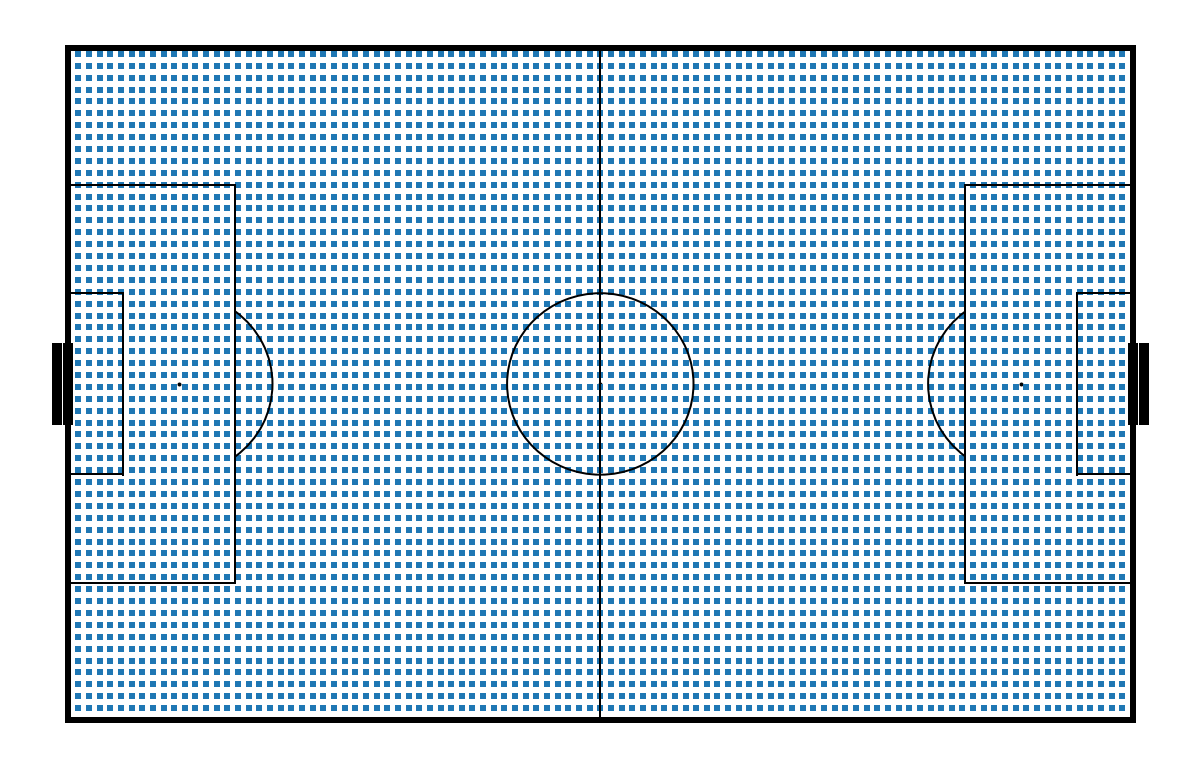

In [7]:
model = A2C.load('saved_models/a2c_soccer_actions_env_1_0')
visualize_model(model);

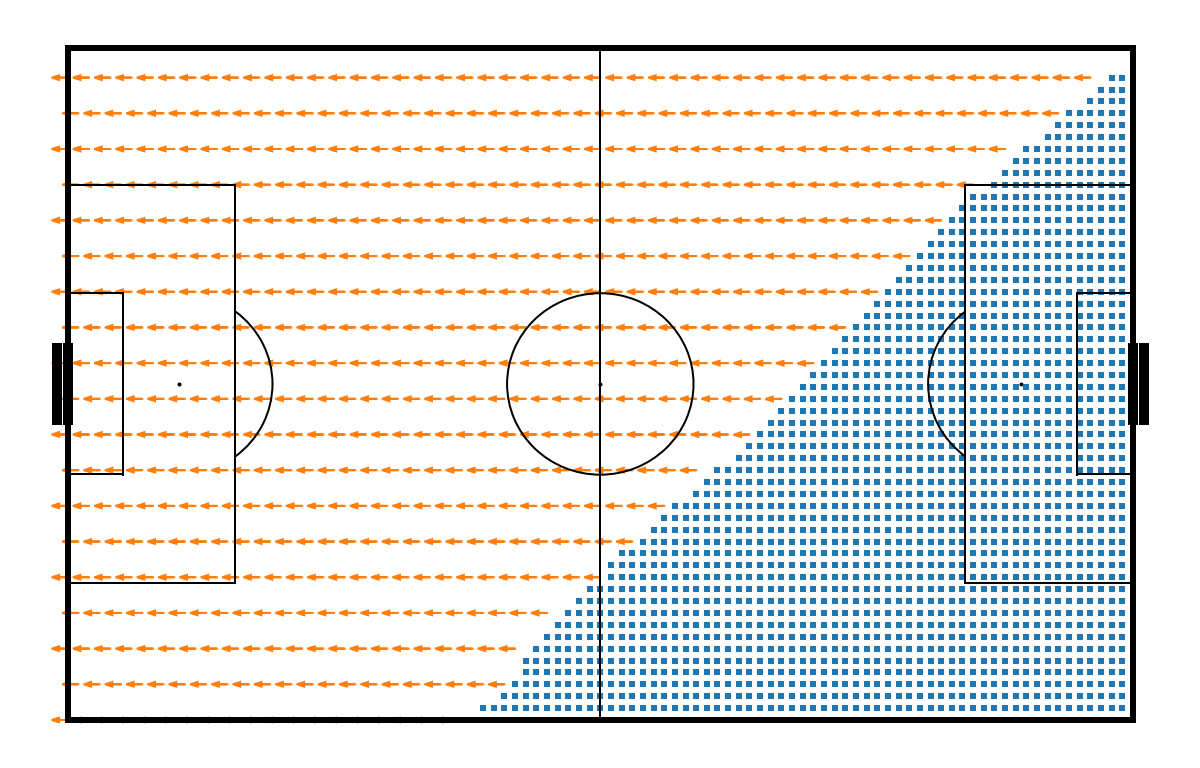

In [8]:
model = DDPG.load('saved_models/ddpg_soccer_actions_env_1_8')
visualize_model(model);

ipykernel_launcher:16: RuntimeWarning: invalid value encountered in double_scalars


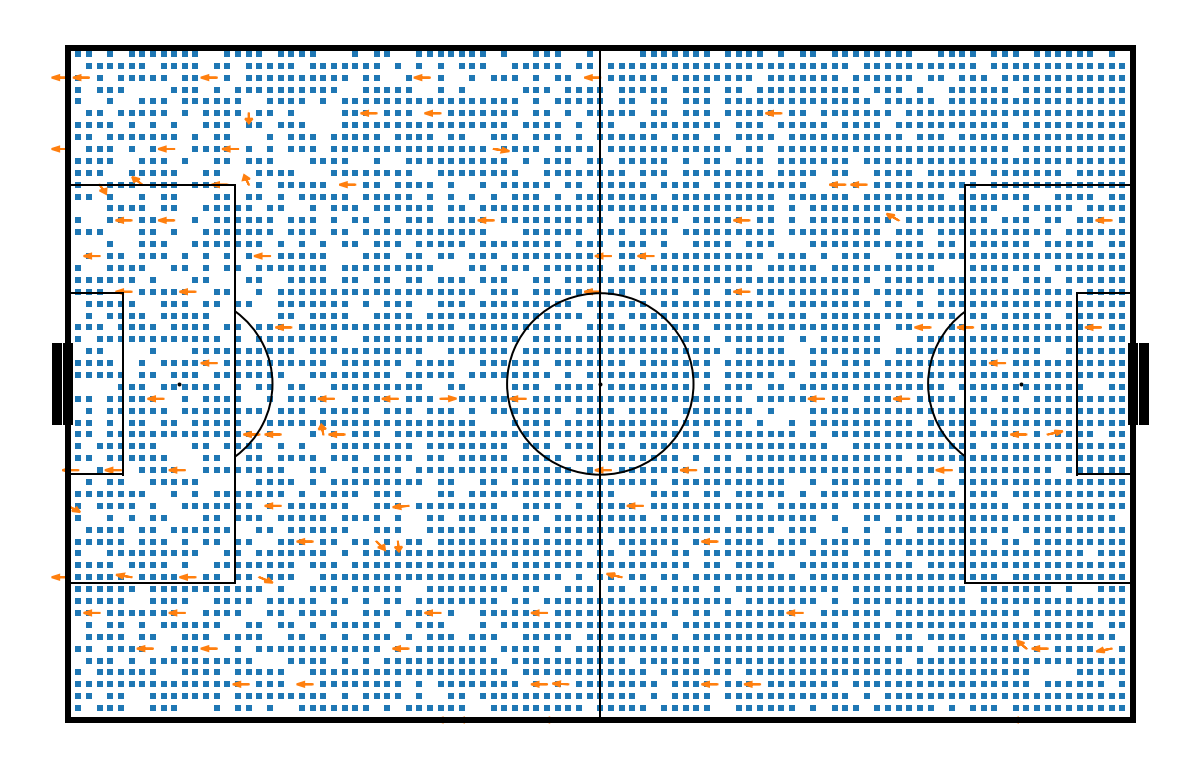

In [9]:
model = PPO.load('saved_models/ppo_soccer_actions_env_1_0')
visualize_model(model);

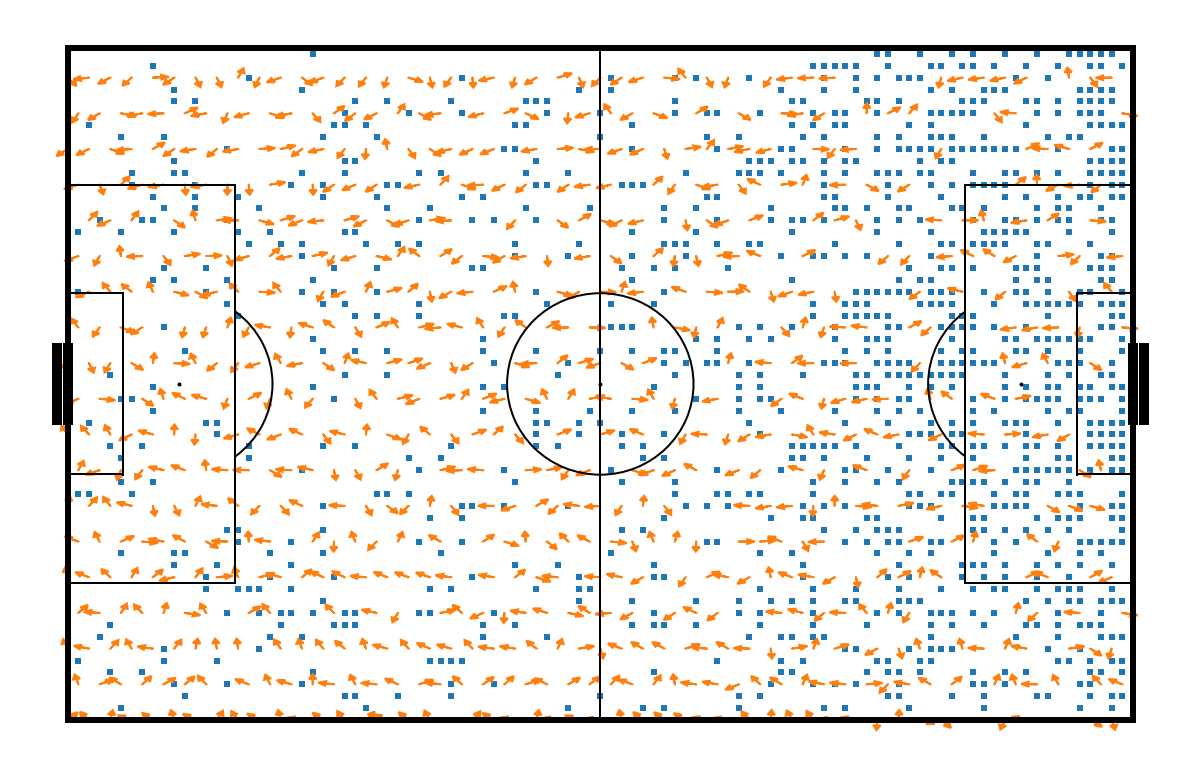

In [10]:
model = SAC.load('saved_models/sac_soccer_actions_env_1_0')
visualize_model(model);

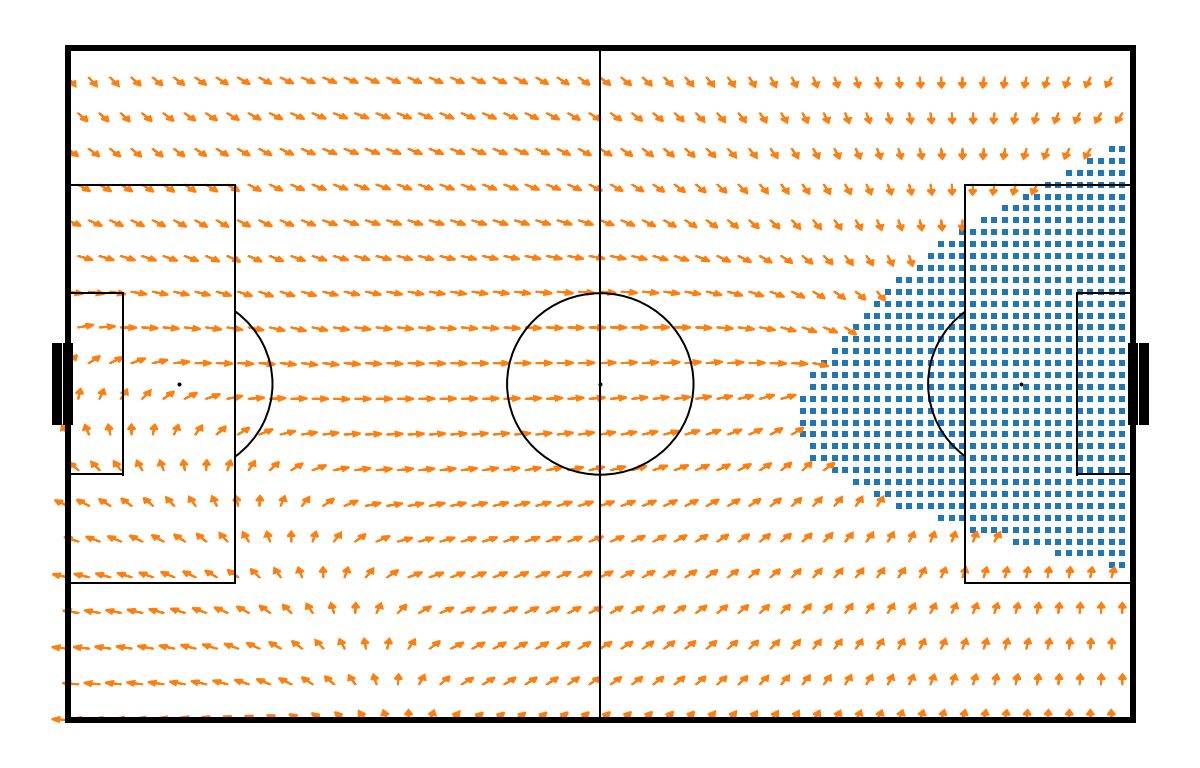

In [11]:
model = TD3.load('saved_models/td3_soccer_actions_env_1_0')
visualize_model(model);

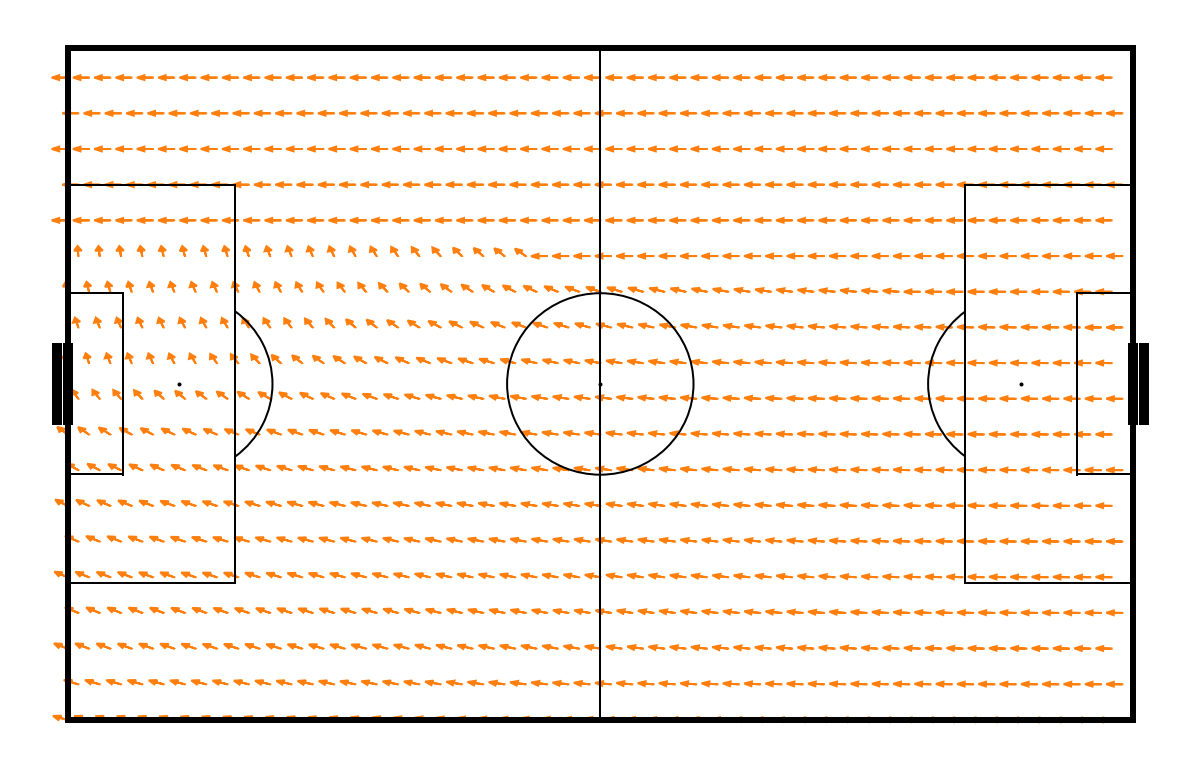

In [16]:
model = DDPG.load('saved_models/ddpg_soccer_actions_env_2_BIG2')
visualize_model(model);